In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [5]:
session = Session(engine)
meas_first = session.query(Measurements).first()
meas_first

In [6]:
meas_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a12bd9828>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [9]:
rain = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= "2016-08-23").\
group_by(Measurements.date).all()
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-26,0.01
4,2016-08-27,NaN


In [12]:
rain_2017_df = rain_df.set_index("date")
rain_2017_df.head()

,prcp
date,
2016-08-23,0.70
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN


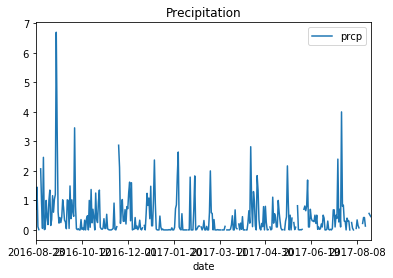

In [13]:
rain_2017_df.plot()
plt.title("Precipitation")
plt.savefig("Precipitation")
plt.show()

In [14]:
total_rain = rain_2017_df["prcp"].sum()
total_rain

149.07000000000008

In [15]:
rain_stats = rain_2017_df.describe()
rain_stats

,prcp
count,345.000000
mean,0.432087
std,0.704363
min,0.000000
25%,0.010000
50%,0.140000
75%,0.580000
max,6.700000


In [16]:
stations_first = session.query(Stations).first()
stations_first

In [17]:
stations_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a1b441d68>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'location': None,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [18]:
total_stations = session.query(Stations.station).count()
total_stations

9

In [20]:
active_station = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
most_active = active_station[0][0]
most_active

'USC00519281'

In [22]:
tobs = session.query(Measurements.tobs).filter(Measurements.date >= "2016-08-23", Measurements.station == most_active).all()
tobs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [23]:
tobs_df = pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


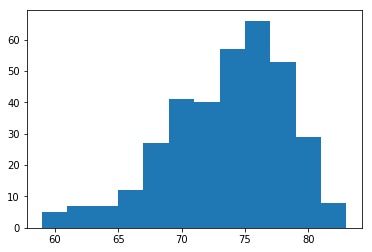

In [25]:
plt.hist(tobs_df["tobs"], bins=12)
plt.show()

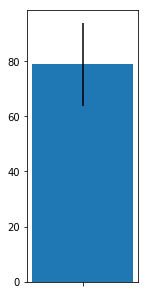

In [26]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= start_date,\
         Measurements.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2017-08-03", "2017-08-19")